Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Akshata Padalkar"
COLLABORATORS = ""

---

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\to$ Restart) and then **run all cells** (in the menubar, select Cell $\to$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>:Akshata Padalkar<br> 
<b>NetID</b>:anp178<br>
<b>Recitation #</b>:2<br>
<b>Notes to Grader</b> (optional):<br>
    Graphs may not show up in read only version, but once run, will show.
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: AP     (eg: NC for Naina Chaturvedi)

# CS 439 - Introduction to Data Science
### Spring 2025

## Lab 4 - Unsupervised Learning (100 points)
### Due Date: TBA

In this lab, you will doing unsupervised learning for customer segmentation! This notebook has multiple tasks that you need to complete. To complete a task, just double click on the cell (notebook must be opened in Jupyter/CodeBench) and enter your answer. Be sure to save the notebook often (ctrl-S or cmd-S) and execute the cell (Shift-Enter) to make sure you code is saved and executes correctly.

### Lab Discussions
Post any questions regarding this lab to canvas discussion board on Lab 03 or visit office hours.

## Course Policies

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. You are not allowed to copy code from other notebooks. Attempting to submit code that is not yours can result in penalties and academic disciplinary actions. Please consult course staff for any clarification regarding collaboration policies.

**AI Policy**

We **only allow** the use of responsible **AI tool youchat** to help you find information as you write code to solve labs. The use of AI should be done cautiously. It **does not** free you from understanding the code you write. Being able to read, interpret and test code written by AI is required for you to answer questions in quizzes and exams. **DO NOT use** other AI tools such as chatGPT and Bard.

### Running a Cell 

Try running the following cell.  If you are unfamiliar with Jupyter Notebooks, consider skimming [this tutorial](https://docs.jupyter.org/en/latest/) or selecting **Help** in the menu above. TO run the cell below, place the cursor on the cell and press **(SHIFT-ENTER)** or choose Run from the Jupyter menu above.

### NOTE: Whenever an interpretation is asked, you must provide one to receive full points.

For this lab we'll be using iris dataset found in seaborn's dataset repository

In [5]:
# import necessary libraries
import pandas as pd

### Task 1: Understanding the dataset (10 Points)

#### Task 1(a): Read the Dataset (5 Points)
- We'll be working on the [Wholesale customers](https://archive.ics.uci.edu/dataset/292/wholesale+customers) dataset.
- Read the  `Wholesale customers data.csv` file.

In [6]:
# Write your code here
file_name = 'cs439/Lab 05/Wholesale customers data.csv'
def read_data(file_name):
    """
    Read the data from the file and return a Pandas DataFrame
    file_name: str, name of the file to read
    return: Pandas DataFrame
    """
    df = pd.read_csv(file_name)
    return df
    pass

# Do not modify the code below
try:
    data = read_data("Wholesale customers data.csv")
    display(data)
    assert 'Channel' in data.columns
    assert 'Region' in data.columns
    assert 'Fresh' in data.columns
    assert 'Milk' in data.columns
    assert 'Grocery' in data.columns
    assert 'Frozen' in data.columns
    assert 'Detergents_Paper' in data.columns
    assert 'Delicassen' in data.columns
    print("Your solution is correct!")
except Exception as e:
    print(f"OOPS! There is an error. {e}")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656.0,7561,214.0,2674.0,1338
1,2,3,7057,9810.0,9568,1762.0,3293.0,1776
2,2,3,7057,9810.0,9568,1762.0,3293.0,1776
3,2,3,6353,8808.0,7684,2405.0,3516.0,7844
4,1,3,13265,1196.0,4221,6404.0,507.0,1788
...,...,...,...,...,...,...,...,...
438,1,3,29703,12051.0,16027,13135.0,182.0,2204
439,1,3,39228,1431.0,764,4510.0,93.0,2346
440,2,3,14531,15488.0,30243,437.0,14841.0,1867
441,1,3,10290,1981.0,2232,1038.0,168.0,2125


Your solution is correct!


#### Task 1(b): Understand the Data (5 Points)

- What do each of the columns in the dataset mean? Explain what each column represents
- Visit the provided link and describe your understanding of the dataset, including a brief description of each column.

In [7]:
# Inspect the data here
df = read_data("Wholesale customers data.csv")
print(df.head())
print(df.info())       
print(df.describe())  

   Channel  Region  Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656.0     7561   214.0            2674.0   
1        2       3   7057  9810.0     9568  1762.0            3293.0   
2        2       3   7057  9810.0     9568  1762.0            3293.0   
3        2       3   6353  8808.0     7684  2405.0            3516.0   
4        1       3  13265  1196.0     4221  6404.0             507.0   

   Delicassen  
0        1338  
1        1776  
2        1776  
3        7844  
4        1788  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           443 non-null    int64  
 1   Region            443 non-null    int64  
 2   Fresh             443 non-null    int64  
 3   Milk              441 non-null    float64
 4   Grocery           443 non-null    int64  
 5   Frozen            442 non-null   

columns of spending for each category
FRESH: Annual spending ranges from 3 to 112,151, with a mean of approximately 12,000.30 and a standard deviation of 12,647.33, indicating high variability.
MILK: Spending ranges from 55 to 73,498, with a mean of about 5,796.27.
GROCERY: Ranges from 3 to 92,780, with a mean of 7,951.28 and a standard deviation of 9,503.16, reflecting diverse spending behaviors.
FROZEN: Spending ranges from 25 to 60,869, with a mean of approximately 3,071.93.
DETERGENTS_PAPER: Ranges from 3 to 40,827, with a mean of 2,881.49.
DELICATESSEN: Ranges from 3 to 47,943, with a mean of 1,524.87 and a standard deviation of 2,820.11, indicating lower spending compared to other categories.
Nominal Variables:
CHANNEL: Categorizes purchases into Horeca (Hotel/Restaurant/Café) and Retail.
REGION: Represents customers' geographical regions.
Summary Statistics
The dataset provides a comprehensive view of customer spending across different product categories, with significant variability in spending amounts.
The nominal variables (Channel and Region) help categorize customers, which can be useful for targeted marketing and sales strategies.

### Task 2: Data Wrangling (10 Points)
- Remove any duplicates, null values, and unnecessary columns in the dataset

In [8]:
# Write your code here
def pre_process(data):
    """
    Preprocess the data to remove null values and duplicates
    data: Pandas DataFrame
    return: Pandas DataFrame
    """
    if 'Unnamed: 0' in data.columns:
        data = data.drop(columns=['Unnamed: 0'])
    data = data.dropna()
    data = data.drop_duplicates()
    return data
    pass

# Do not modify the code below
try:
    clean_data = pre_process(data)
    display(clean_data)
    assert 'Unnamed: 0' not in clean_data.columns
    assert clean_data.isna().sum().sum() == 0, "Data contains null values"
    assert clean_data.duplicated().sum() == 0, "Data contains duplicates"
    print("Your solution is correct!")
except Exception as e:
    print(f"OOPS! There is an error. {e}")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656.0,7561,214.0,2674.0,1338
1,2,3,7057,9810.0,9568,1762.0,3293.0,1776
3,2,3,6353,8808.0,7684,2405.0,3516.0,7844
4,1,3,13265,1196.0,4221,6404.0,507.0,1788
5,2,3,22615,5410.0,7198,3915.0,1777.0,5185
...,...,...,...,...,...,...,...,...
438,1,3,29703,12051.0,16027,13135.0,182.0,2204
439,1,3,39228,1431.0,764,4510.0,93.0,2346
440,2,3,14531,15488.0,30243,437.0,14841.0,1867
441,1,3,10290,1981.0,2232,1038.0,168.0,2125


Your solution is correct!


### Task 3: KMeans Clustering (20 Points)

#### Task 3(a): Determining the number of Clusters (10 Points)
- Determine the number of clusters using KMeans and an appropriate graph.

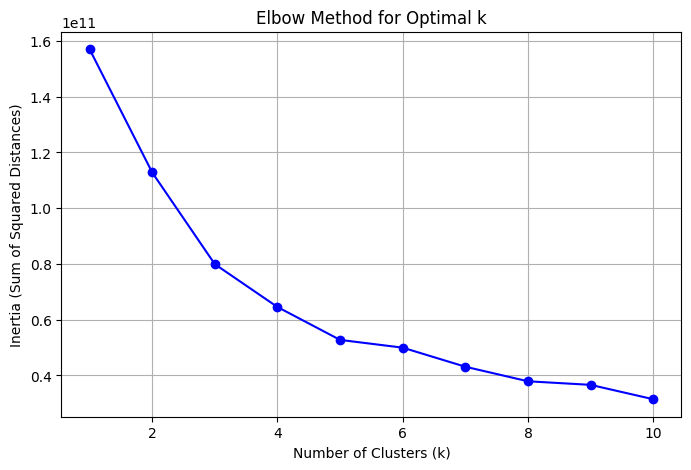

Inertia values for each k:
k = 1: Inertia = 157024253904.88
k = 2: Inertia = 112809577253.83
k = 3: Inertia = 79916676304.40
k = 4: Inertia = 64554047083.40
k = 5: Inertia = 52753427427.93
k = 6: Inertia = 49973259512.67
k = 7: Inertia = 43131958363.62
k = 8: Inertia = 37911857635.67
k = 9: Inertia = 36631877247.62
k = 10: Inertia = 31478063022.91
Your solution might be correct!


In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def cluster_analysis_plot(data):
    """
    Plot the appropriate plot for determining the number of clusters
    data: Pandas DataFrame
    return: None
    """
    inertias = []
    k_range = range(1, 11)  # Test for 1 through 10 clusters

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

    print("Inertia values for each k:")
    for k, inertia in zip(k_range, inertias):
        print(f"k = {k}: Inertia = {inertia:.2f}")
    pass

# Do not modify the code below
try:
    cluster_analysis_plot(clean_data)
    print("Your solution might be correct!")
except Exception as e:
    print(f"OOPS! There is an error. {e}")

##### What is the optimal number of clusters?

The optimal number of clusters is when the rate of decrease in inertia sharply changes which seems to happen when k = 4

#### Task 3(b): Clustering the data (10 Points)
- Cluster the data into appropriate number of clusters determined above
- The new dataset should have a new columns called "KMeans_Cluster"
- Do not modify the original dataframe

In [10]:
def kmeans_clustering(data):
    """
    Perform KMeans clustering on the data
    data: Pandas DataFrame
    n_clusters: int, number of clusters
    return: Pandas DataFrame with cluster labels
    """
    data_copy = data.copy()
    optimal = 4
    kmeans = KMeans(n_clusters= optimal, random_state=42)
    cluster_labels = kmeans.fit_predict(data_copy)
    data_copy["KMeans_Cluster"] = cluster_labels
    
    return data_copy
    pass

# Do not modify the code below
try:
    clustered_data = kmeans_clustering(clean_data)
    display(clustered_data)
    assert 'KMeans_Cluster' in clustered_data.columns
    print("Your solution might be correct!")
except Exception as e:
    print(f"OOPS! There is an error. {e}")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Cluster
0,2,3,12669,9656.0,7561,214.0,2674.0,1338,1
1,2,3,7057,9810.0,9568,1762.0,3293.0,1776,1
3,2,3,6353,8808.0,7684,2405.0,3516.0,7844,1
4,1,3,13265,1196.0,4221,6404.0,507.0,1788,1
5,2,3,22615,5410.0,7198,3915.0,1777.0,5185,2
...,...,...,...,...,...,...,...,...,...
438,1,3,29703,12051.0,16027,13135.0,182.0,2204,2
439,1,3,39228,1431.0,764,4510.0,93.0,2346,2
440,2,3,14531,15488.0,30243,437.0,14841.0,1867,0
441,1,3,10290,1981.0,2232,1038.0,168.0,2125,1


Your solution might be correct!


### Task 4: Hierarchical Clustering (20 Points)

#### Task 4(a): Determining the number of Clusters (10 Points)
- Determine the number of clusters using Hierarchical Clustering and an appropriate graph.

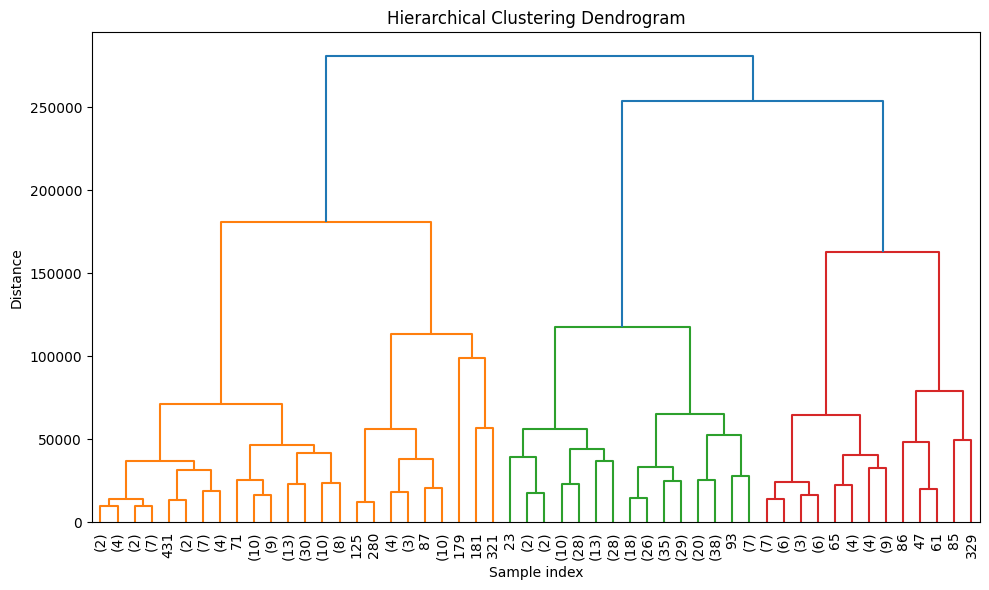

Your solution might be correct!


In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def cluster_analysis_plot_hierarchical(data):
    """
    Plot the appropriate plot for determining the number of clusters
    data: Pandas DataFrame
    return: None
    """
    linked = linkage(data, method='ward')
    plt.figure(figsize=(10, 6))
    dendrogram(linked,
               truncate_mode='level',  
               p=5,                    # depth of the dendrogram
               leaf_rotation=90,
               leaf_font_size=10)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()
    pass

# Do not modify the code below
try:
    cluster_analysis_plot_hierarchical(clean_data)
    print("Your solution might be correct!")
except Exception as e:
    print(f"OOPS! There is an error. {e}")

##### What is the optimal number of clusters?

If we cut between the heights of 100,000 and 200,000 the optimal number of clusters is 4.

#### Task 4(b): Clustering the data (10 Points)
- Cluster the data into appropriate number of clusters determined above
- Assume the input dataset is the `cleaned_data`
- Creat clusters using `cleaned_data`, and append the clusters in a new column called Hierarchical_Cluster in the `clustered_data`

In [12]:
from sklearn.cluster import AgglomerativeClustering

def hierarchical_clustering(data):
    """
    Perform hierarchical clustering on the data
    data: Pandas DataFrame
    n_clusters: int, number of clusters
    return: None
    """
    n_clusters = 4 
    
    model = AgglomerativeClustering(n_clusters=n_clusters)
    
    data['Hierarchical_Cluster'] = model.fit_predict(data)
    
    # Update the clustered_data DataFrame
    global clustered_data
    clustered_data = data
    pass

# Do not modify the code below
try:
    hierarchical_clustering(clean_data)
    display(clustered_data)
    assert 'Hierarchical_Cluster' in clustered_data.columns
    print("Your solution might be correct!")
except Exception as e:
    print(f"OOPS! There is an error. {e}")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Hierarchical_Cluster
0,2,3,12669,9656.0,7561,214.0,2674.0,1338,2
1,2,3,7057,9810.0,9568,1762.0,3293.0,1776,2
3,2,3,6353,8808.0,7684,2405.0,3516.0,7844,2
4,1,3,13265,1196.0,4221,6404.0,507.0,1788,2
5,2,3,22615,5410.0,7198,3915.0,1777.0,5185,3
...,...,...,...,...,...,...,...,...,...
438,1,3,29703,12051.0,16027,13135.0,182.0,2204,3
439,1,3,39228,1431.0,764,4510.0,93.0,2346,1
440,2,3,14531,15488.0,30243,437.0,14841.0,1867,0
441,1,3,10290,1981.0,2232,1038.0,168.0,2125,2


Your solution might be correct!


### Task 5: Visualization (20 Points)

#### Task 5(a): Process data (10 Points)
- Process your data to visualize the results.


In [13]:
from sklearn.decomposition import PCA

def process_data(clustered_data):
    """
    Process the data to the form that it can be visualized
    clustered_data: Pandas DataFrame
    return: Pandas DataFrame
    """
    feature_data = clustered_data.drop(columns=['Hierarchical_Cluster'])

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(feature_data)

    vis_data = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

    vis_data['Hierarchical_Cluster'] = clustered_data['Hierarchical_Cluster'].values

    return vis_data
    pass

# Do not modify the code below
try:
    vis_data = process_data(clustered_data)
    display(vis_data)
    print("Your solution might be correct!")
except Exception as e:
    print(f"OOPS! There is an error. {e}")

,PCA1,PCA2,Hierarchical_Cluster
0,599.022073,1570.066138,2
1,-4457.172283,4067.852885,2
2,-4882.277717,2606.974580,2
3,876.709443,-6296.801025,2
4,10577.629089,-2255.650466,3
...,...,...,...
431,20129.297841,6132.618032,3
432,25752.092469,-11975.233647,1
433,4702.129422,26156.648089,0
434,-2854.753602,-7058.044880,2


Your solution might be correct!


#### Task 5(b) Visualize the clusters
- Use the new data to visualize the clusters

In [ ]:
def visualize_data(vis_data):
    """
    Visualize the data
    vis_data: Pandas DataFrame
    return: None
    """
    plt.figure(figsize=(8, 6))
    
    # Plot each cluster with a different color
    for cluster in vis_data['Hierarchical_Cluster'].unique():
        subset = vis_data[vis_data['Hierarchical_Cluster'] == cluster]
        plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', s=50)

    plt.title('Clusters Visualized using PCA')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    pass

# Do not modify the code below
try:
    visualize_data(vis_data)
    print("Your solution might be correct!")
except Exception as e:
    print(f"OOPS! There is an error. {e}")

### Task 6: Open Ended (20 Points)
- Use any other other clustering techniques other than the onces mention above, and visualize the clusters.

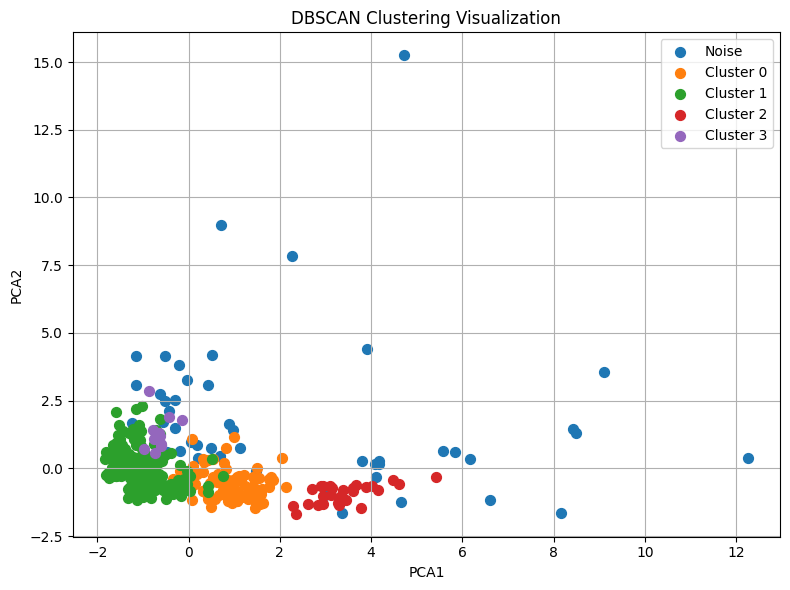

Your solution might be correct!


In [15]:
# Write your code here
#imports
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

def dbscan_clustering(clean_data):
    """
    Perform DBSCAN clustering and visualize results
    """
    #data_no_na = clean_data.dropna()
    scaled_data = StandardScaler().fit_transform(clean_data)

    # Fit DBSCAN
    dbscan = DBSCAN(eps=1.5, min_samples=5)
    labels = dbscan.fit_predict(scaled_data)

    # PCA for visualization
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(scaled_data)

    # Create a DataFrame for visualization
    vis_data = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
    vis_data['DBSCAN_Cluster'] = labels

    plt.figure(figsize=(8, 6))
    for cluster in sorted(vis_data['DBSCAN_Cluster'].unique()):
        subset = vis_data[vis_data['DBSCAN_Cluster'] == cluster]
        plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}' if cluster != -1 else 'Noise', s=50)

    plt.title('DBSCAN Clustering Visualization')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    pass

try:
    dbscan_clustering(clean_data)
    print("Your solution might be correct!")
except Exception as e:
    print(f"OOPS! There is an error. {e}")

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please rename the file as netID_Lab_02_WebScapping_and_EDA (eg: netID = nc123)<br>
<b> Submit through: </b> CodeBench <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>